<a href="https://colab.research.google.com/github/roy392/cautious-goggles/blob/main/tugas_8_Royfernando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd               
import matplotlib.pyplot as plt   
import seaborn as sns
import missingno as msno 
import plotly.graph_objects as go 
import plotly.express as px 
%matplotlib inline             
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier


# deep learning framework: KERAS
from keras.models import Sequential
from keras.layers import Dense

import plotly.graph_objects as go 
import plotly.express as px 
import cufflinks as cf
from plotly.subplots import make_subplots

import os 

In [3]:
df = pd.read_excel('sample_data/Z-Alizadeh sani dataset.xlsx')
df.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,Normal


In [4]:
df.columns

Index(['Age', 'Weight', 'Length', 'Sex', 'BMI', 'DM', 'HTN', 'Current Smoker',
       'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease',
       'Thyroid Disease', 'CHF', 'DLP', 'BP', 'PR', 'Edema',
       'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur',
       'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Function Class',
       'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'Q Wave',
       'St Elevation', 'St Depression', 'Tinversion', 'LVH',
       'Poor R Progression', 'BBB', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN',
       'ESR', 'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE',
       'Region RWMA', 'VHD', 'Cath'],
      dtype='object')

In [5]:
print(df['Sex'].unique())  # mengembalikan data yang unik

print(df['Sex'].nunique()) # mengembalikan jumlah data unik

['Male' 'Fmale']
2


In [6]:
for f in df.columns:
  if df[f].dtype == 'object':
    print(f)
    lbl=LabelEncoder()
    lbl.fit(list(df[f].values))
    df[f]=lbl.transform(list(df[f].values))

Sex
Obesity
CRF
CVA
Airway disease
Thyroid Disease
CHF
DLP
Weak Peripheral Pulse
Lung rales
Systolic Murmur
Diastolic Murmur
Dyspnea
Atypical
Nonanginal
Exertional CP
LowTH Ang
LVH
Poor R Progression
BBB
VHD
Cath


In [7]:
df.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,1,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,1,0
1,67,70,157,0,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,1,0
2,54,54,164,1,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,3,0
3,66,67,158,0,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,2,1
4,50,87,153,0,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,2,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    int64  
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    int64  
 11  CRF                    303 non-null    int64  
 12  CVA                    303 non-null    int64  
 13  Airway disease         303 non-null    int64  
 14  Thyroid Disease        303 non-null    int64  
 15  CHF   

In [9]:
df.nunique()

Age                       46
Weight                    54
Length                    44
Sex                        2
BMI                      263
DM                         2
HTN                        2
Current Smoker             2
EX-Smoker                  2
FH                         2
Obesity                    2
CRF                        2
CVA                        2
Airway disease             2
Thyroid Disease            2
CHF                        2
DLP                        2
BP                        17
PR                        21
Edema                      2
Weak Peripheral Pulse      2
Lung rales                 2
Systolic Murmur            2
Diastolic Murmur           2
Typical Chest Pain         2
Dyspnea                    2
Function Class             4
Atypical                   2
Nonanginal                 2
Exertional CP              1
LowTH Ang                  2
Q Wave                     2
St Elevation               2
St Depression              2
Tinversion    

In [10]:
df.dtypes

Age                        int64
Weight                     int64
Length                     int64
Sex                        int64
BMI                      float64
DM                         int64
HTN                        int64
Current Smoker             int64
EX-Smoker                  int64
FH                         int64
Obesity                    int64
CRF                        int64
CVA                        int64
Airway disease             int64
Thyroid Disease            int64
CHF                        int64
DLP                        int64
BP                         int64
PR                         int64
Edema                      int64
Weak Peripheral Pulse      int64
Lung rales                 int64
Systolic Murmur            int64
Diastolic Murmur           int64
Typical Chest Pain         int64
Dyspnea                    int64
Function Class             int64
Atypical                   int64
Nonanginal                 int64
Exertional CP              int64
LowTH Ang 

In [11]:
df.describe()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,58.897690,73.831683,164.716172,0.580858,27.248339,0.297030,0.590759,0.207921,0.033003,0.158416,...,4.230693,140.996700,7562.046205,32.399340,60.148515,221.488449,47.231023,0.620462,1.930693,0.287129
std,10.392278,11.987358,9.327661,0.494235,4.098865,0.457706,0.492507,0.406491,0.178941,0.365734,...,0.458202,3.807885,2413.739323,9.972592,10.182493,60.796199,8.927194,1.132531,1.109180,0.453171
min,30.000000,48.000000,140.000000,0.000000,18.115413,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,128.000000,3700.000000,7.000000,32.000000,25.000000,15.000000,0.000000,0.000000,0.000000
25%,51.000000,65.000000,158.000000,0.000000,24.514380,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.900000,139.000000,5800.000000,26.000000,52.500000,183.500000,45.000000,0.000000,1.000000,0.000000
50%,58.000000,74.000000,165.000000,1.000000,26.775510,0.000000,1.000000,0.000000,0.000000,0.000000,...,4.200000,141.000000,7100.000000,32.000000,60.000000,210.000000,50.000000,0.000000,2.000000,0.000000
75%,66.000000,81.000000,171.000000,1.000000,29.411765,1.000000,1.000000,0.000000,0.000000,0.000000,...,4.500000,143.000000,8800.000000,39.000000,67.000000,250.000000,55.000000,1.000000,3.000000,1.000000
max,86.000000,120.000000,188.000000,1.000000,40.900658,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.600000,156.000000,18000.000000,60.000000,89.000000,742.000000,60.000000,4.000000,3.000000,1.000000


In [12]:
df.duplicated().sum()

0

In [13]:
df = df.drop(['Length', 'BP', 'Lymph','FH','HB'], axis=1)

df.head()

,Age,Weight,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,Obesity,CRF,...,ESR,K,Na,WBC,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,1,29.387755,0,1,1,0,1,0,...,7,4.7,141,5700,52,261,50,0,1,0
1,67,70,0,28.398718,0,1,0,0,1,0,...,26,4.7,156,7700,55,165,40,4,1,0
2,54,54,1,20.077335,0,0,1,0,0,0,...,10,4.7,139,7400,60,230,40,2,3,0
3,66,67,0,26.838648,0,1,0,0,1,0,...,76,4.4,142,13000,72,742,55,0,2,1
4,50,87,0,37.165193,0,1,0,0,1,0,...,27,4.0,140,9200,39,274,50,0,2,1


In [14]:
df['Region RWMA'].unique()

array([0, 4, 2, 3, 1])

In [15]:
df[df['Region RWMA']==4]

,Age,Weight,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,Obesity,CRF,...,ESR,K,Na,WBC,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
1,67,70,0,28.398718,0,1,0,0,1,0,...,26,4.7,156,7700,55,165,40,4,1,0
6,55,80,1,29.384757,0,0,0,1,1,0,...,38,4.8,139,9400,33,292,40,4,3,0
7,72,80,1,26.122449,1,0,1,0,1,0,...,4,4.3,142,12200,74,410,45,4,3,0
12,70,70,0,30.700408,1,1,0,0,1,0,...,80,4.3,148,11300,70,380,25,4,0,0
28,80,51,0,23.283419,0,1,0,0,0,0,...,12,5.1,149,12400,55,260,40,4,3,0
34,55,80,1,28.685145,0,0,0,0,1,0,...,6,5.4,130,10000,70,210,20,4,0,0
37,54,74,1,28.196921,0,1,0,0,1,0,...,10,3.8,142,12100,58,194,20,4,3,0
38,76,56,1,21.077195,1,0,0,0,0,0,...,2,4.9,130,18000,60,340,35,4,0,0
39,46,80,1,26.122449,1,1,0,0,1,0,...,22,4.0,142,8000,45,230,20,4,0,0
40,76,89,1,25.725517,0,1,1,0,1,0,...,8,4.5,141,6600,63,208,25,4,3,0


In [16]:
df.loc[df['Region RWMA']==0.2]
df['Region RWMA'].unique()

array([0, 4, 2, 3, 1])

In [17]:
df.VHD.value_counts()

3    149
1    116
0     27
2     11
Name: VHD, dtype: int64

In [18]:
df.loc[df['VHD']==4,'VHD']=np.NAN
df[df['VHD']==4]

,Age,Weight,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,Obesity,CRF,...,ESR,K,Na,WBC,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath


In [19]:
df['VHD'].unique()

array([1., 3., 2., 0.])

In [20]:
df.columns

Index(['Age', 'Weight', 'Sex', 'BMI', 'DM', 'HTN', 'Current Smoker',
       'EX-Smoker', 'Obesity', 'CRF', 'CVA', 'Airway disease',
       'Thyroid Disease', 'CHF', 'DLP', 'PR', 'Edema', 'Weak Peripheral Pulse',
       'Lung rales', 'Systolic Murmur', 'Diastolic Murmur',
       'Typical Chest Pain', 'Dyspnea', 'Function Class', 'Atypical',
       'Nonanginal', 'Exertional CP', 'LowTH Ang', 'Q Wave', 'St Elevation',
       'St Depression', 'Tinversion', 'LVH', 'Poor R Progression', 'BBB',
       'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR', 'K', 'Na', 'WBC', 'Neut',
       'PLT', 'EF-TTE', 'Region RWMA', 'VHD', 'Cath'],
      dtype='object')

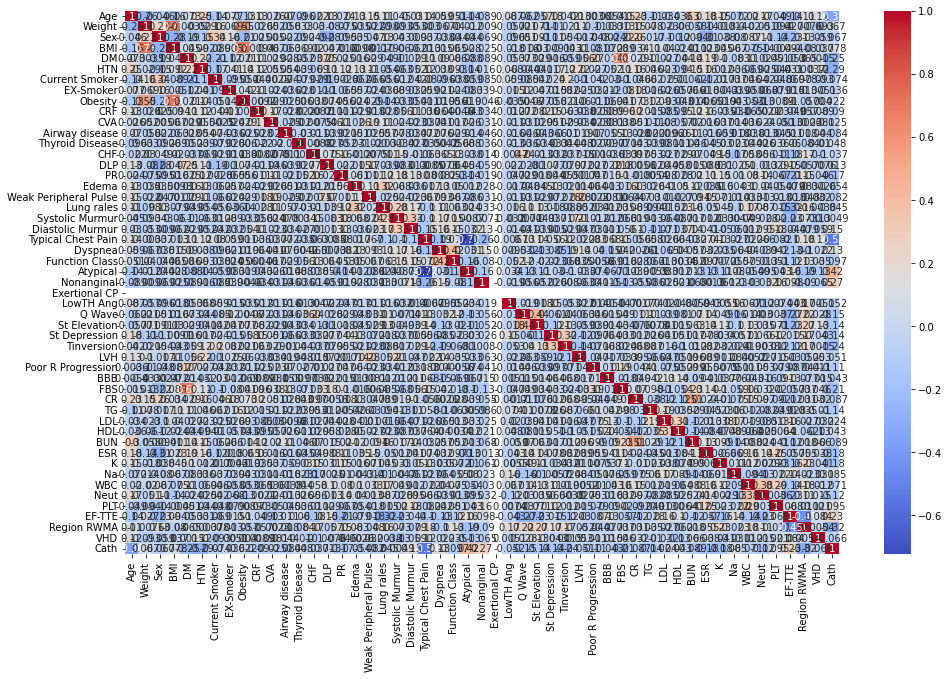

In [21]:
corr=df.corr()
top_corr = corr.index
plt.figure(figsize=(16,10))
corr_plot=sns.heatmap(df[top_corr].corr(),annot=True,cmap='coolwarm')

In [22]:
cat = ['Sex', 'Current Smoker', 'EX-Smoker', 'Region RWMA', 'Cath','Thyroid Disease']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



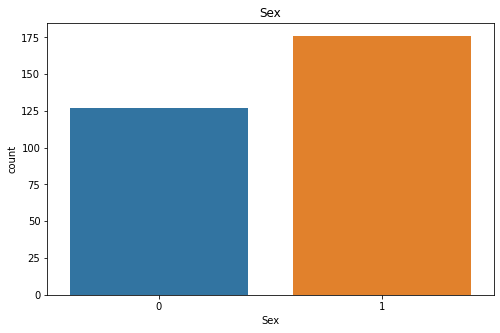

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



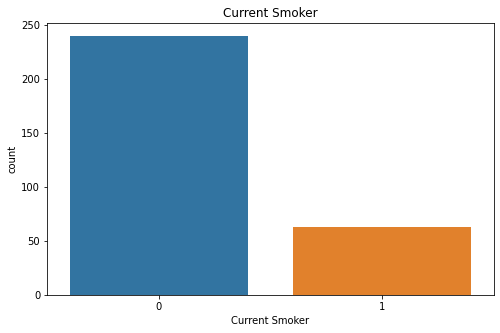

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



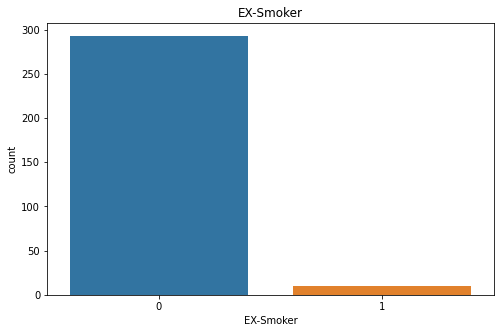

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



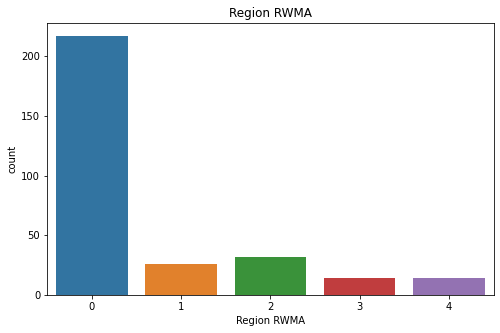

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



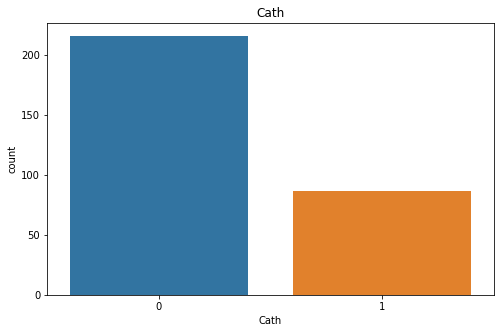

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



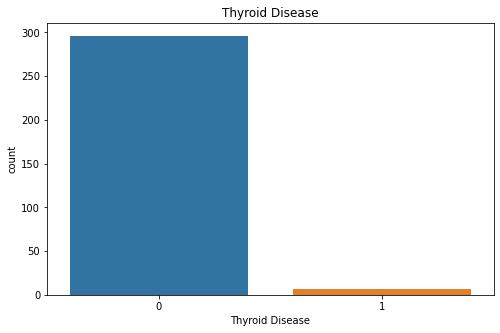

In [23]:
for column in cat:
  plt.figure(figsize=(8,5))
  plt.title(f"{column}")
  sns.countplot(df[column])
  plt.show()

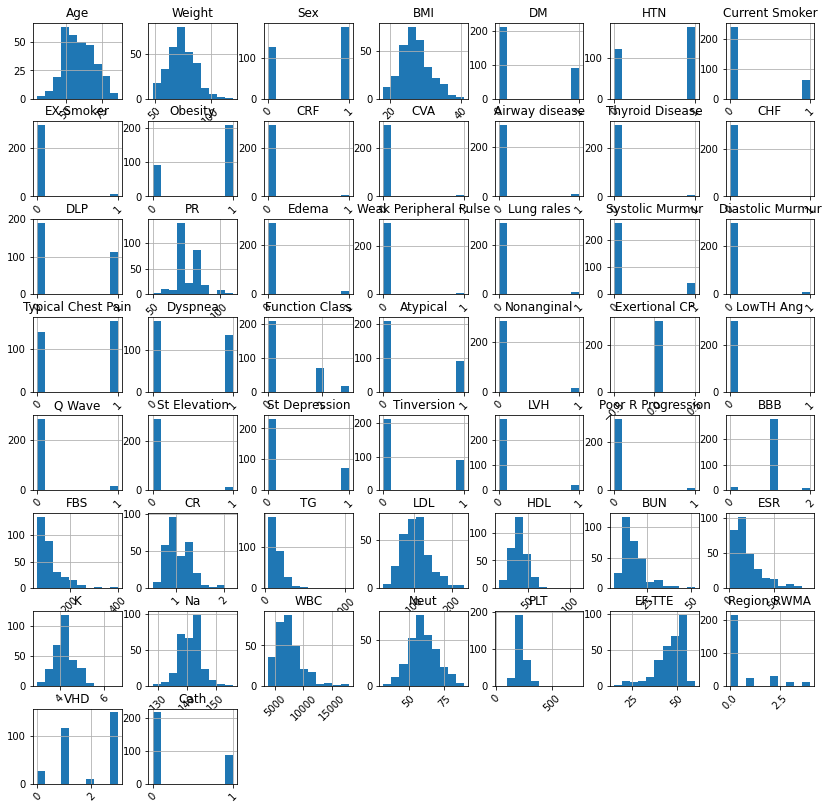

In [24]:
df.hist(figsize=(14,14), xrot=45)
plt.show()

##kesimpulan

In [25]:
cat = ['	Weight', 'Sex', 'Current Smoker', 'EX-Smoker', 'Cath']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



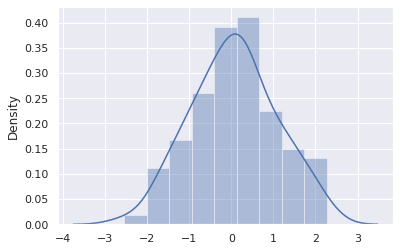

In [26]:
import seaborn as sns, numpy as np
sns.set_theme(); np.random.seed(0)
x = np.random.randn(100)
ax = sns.distplot(x)


In [27]:
features = df.values[:,:8]
labels = df.values[:,8:]
features
labels

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 4., 1., 0.],
       [0., 0., 0., ..., 2., 3., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 1.],
       [1., 0., 0., ..., 0., 1., 1.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=20)
print('jumlah data latih', X_train.shape)
print('jumlah data uji', X_test.shape)

print('jumlah label latih', y_train.shape)
print('jumlah label uji', y_test.shape)

jumlah data latih (227, 8)
jumlah data uji (76, 8)
jumlah label latih (227, 43)
jumlah label uji (76, 43)


In [29]:
model = Sequential()
model.add(Dense(48, input_dim=8, activation='relu'))    # add input layer + 1st hidden layer
model.add(Dense(8, activation='relu'))                  # add 2nd hidden layer
model.add(Dense(1, activation='sigmoid'))   
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                432       
                                                                 
 dense_1 (Dense)             (None, 8)                 392       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [32]:
df.columns

Index(['Age', 'Weight', 'Sex', 'BMI', 'DM', 'HTN', 'Current Smoker',
       'EX-Smoker', 'Obesity', 'CRF', 'CVA', 'Airway disease',
       'Thyroid Disease', 'CHF', 'DLP', 'PR', 'Edema', 'Weak Peripheral Pulse',
       'Lung rales', 'Systolic Murmur', 'Diastolic Murmur',
       'Typical Chest Pain', 'Dyspnea', 'Function Class', 'Atypical',
       'Nonanginal', 'Exertional CP', 'LowTH Ang', 'Q Wave', 'St Elevation',
       'St Depression', 'Tinversion', 'LVH', 'Poor R Progression', 'BBB',
       'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR', 'K', 'Na', 'WBC', 'Neut',
       'PLT', 'EF-TTE', 'Region RWMA', 'VHD', 'Cath'],
      dtype='object')

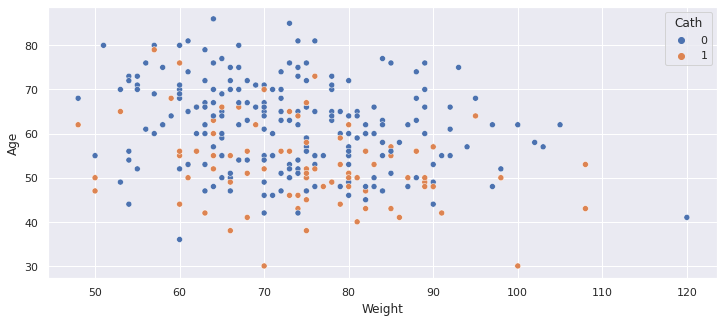

In [33]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Weight', y='Age', hue='Cath', data=df)
plt.show()

Keseimpulan:

Berdasarkan hasil penelitian dapat
disimpulkan bahwa distribusi frekuensi
responden berdasarkan  mayoritas
adalah  tiga yang berjumlah 28 orang
(46,7%), mayoritas  sebanyak
59 responden (87,9%), sebanyak 29 orang
(48,3%), mayoritas responden merokok
sebanyak 36 responden (60,0%), mayoritas
umur pertama kali merokok umur 17 tahun

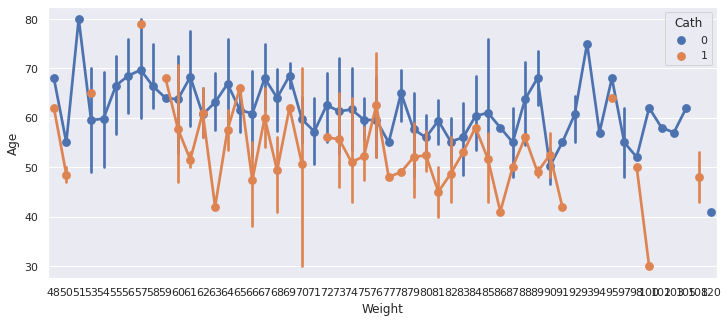

In [34]:
plt.figure(figsize=(12,5))
sns.pointplot(x='Weight', y='Age', hue='Cath', data=df)
plt.show()

Keseimpulan:

Bisa mendapatkan umur rata-rata perokok yang bertahan dan meninggalkan rokok dari indonesia.

Umur rata-rata perokok yang meninggalkan rokok di dunia adalah 45-60 tahun.
Umur rata-rata Perokok yang Pertama kali  adalah 17-30 tahun.

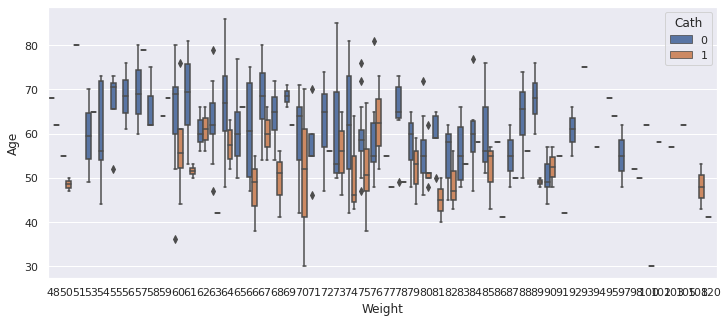

In [35]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Weight', y='Age', hue='Cath', data=df)
plt.show()

Keseimpulan:

Boxplot di atas sama persis, padahal jumlah data dari indonesia berbeda. Lebih baik menggunakan pointplot.

In [36]:
df.corr()

,Age,Weight,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,Obesity,CRF,...,ESR,K,Na,WBC,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
Age,1.000000,-0.264585,-0.045769,-0.161414,0.072543,0.246690,-0.143879,0.076608,-0.126190,0.126980,...,0.183127,0.154203,-0.071886,0.020398,0.173030,-0.049500,-0.140512,0.108663,0.117735,-0.357247
Weight,-0.264585,1.000000,0.234529,0.725005,-0.003531,-0.028532,0.157385,0.068977,0.547267,-0.025713,...,-0.139314,-0.018287,0.013916,-0.020214,-0.051093,-0.094192,0.026789,-0.007648,-0.092527,0.066833
Sex,-0.045769,0.234529,1.000000,-0.284088,-0.194348,-0.149278,0.336330,0.156932,-0.211808,0.024718,...,-0.306189,-0.038046,-0.079913,0.086823,0.112422,-0.143698,-0.230896,0.128955,-0.059207,-0.067041
BMI,-0.161414,0.725005,-0.284088,1.000000,0.045360,0.091652,-0.089398,0.005016,0.712501,0.009386,...,0.023259,0.044587,0.067402,-0.074928,-0.140037,-0.003964,0.093903,-0.079739,-0.037365,0.078189
DM,0.072543,-0.003531,-0.194348,0.045360,1.000000,0.217864,-0.208458,-0.120087,0.020839,0.114975,...,0.190397,0.100064,-0.083030,0.110345,-0.024417,0.051054,-0.052507,0.064891,0.001550,-0.252897
HTN,0.246690,-0.028532,-0.149278,0.091652,0.217864,1.000000,-0.169000,0.041045,0.136482,0.118299,...,0.161704,0.011826,0.036355,-0.069374,-0.025476,-0.043840,0.031365,-0.000372,0.117629,-0.287761
Current Smoker,-0.143879,0.157385,0.336330,-0.089398,-0.208458,-0.169000,1.000000,-0.094652,-0.050782,0.043924,...,-0.121199,-0.016599,0.036812,0.046205,0.042115,-0.048473,-0.068943,0.078479,-0.092783,-0.073504
EX-Smoker,0.076608,0.068977,0.156932,0.005016,-0.120087,0.041045,-0.094652,1.000000,0.041635,0.106345,...,0.017858,-0.004318,-0.038716,-0.057655,-0.068122,-0.079102,-0.015153,0.012996,-0.005121,-0.035578
Obesity,-0.126190,0.547267,-0.211808,0.712501,0.020839,0.136482,-0.050782,0.041635,1.000000,-0.009181,...,0.006545,0.001942,0.042850,-0.053290,-0.126619,-0.008876,0.104896,-0.056608,0.004043,0.022461
CRF,0.126980,-0.025713,0.024718,0.009386,0.114975,0.118299,0.043924,0.106345,-0.009181,1.000000,...,0.158165,-0.035429,-0.031033,-0.064608,-0.002076,0.072621,-0.048870,-0.057046,0.008896,-0.090205


In [37]:
import matplotlib

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


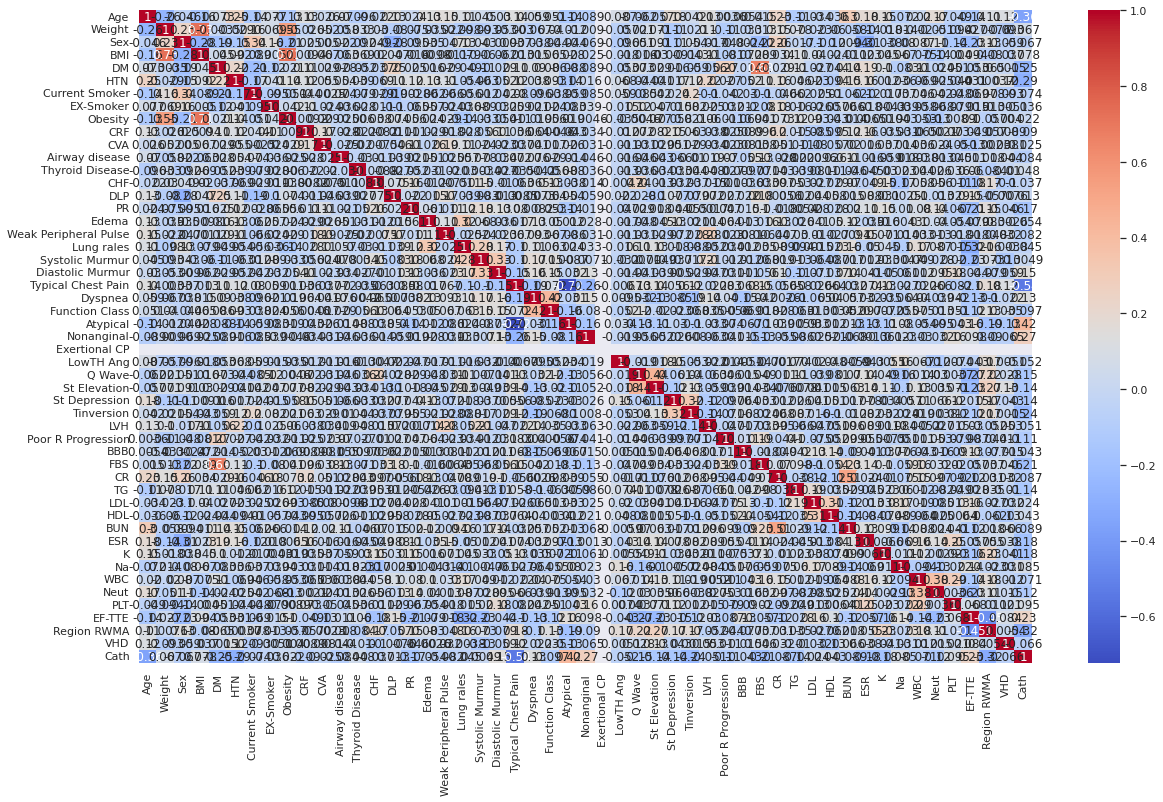

In [38]:
font = {'size':12, 'family':'normal'}
matplotlib.rc('font', **font)
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')